In [58]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import preprocessing_functions
import pycaret
from pycaret.classification import *
from scipy.stats import pearsonr
from dataprep.eda import create_report
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

Basic preprocessing actions (Fitbit)
1. Select experiment dates
2. Drop duplicates
3. Type conversion
4. One hot encoding

In [59]:
fitbit=pd.read_pickle('data/daily_fitbit_df_unprocessed.pkl')
fitbit=preprocessing_functions.fitbit_basic_preprocessing(fitbit)
fitbit=preprocessing_functions.fitbit_one_hot_encoding(fitbit)

Basic preprocessing actions (Sema)
1. Group positive and negative feelings


In [60]:
sema=pd.read_pickle('data/semas_read_from_the_base_experiment_dates.pkl')
sema = sema.sort_values(by='date', ascending=True)
sema=preprocessing_functions.sema_basic_preprocessing(sema)

In [61]:
data = pd.merge(fitbit, sema, on=['date','id'], how='right')

In [62]:
#create_report(data).show_browser()

In [63]:
data = data.drop(columns=['positive_feelings'])
keep=data

In [64]:
data = preprocessing_functions.date_engineering(data)

In [65]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

<AxesSubplot: xlabel='count', ylabel='negative_feelings'>

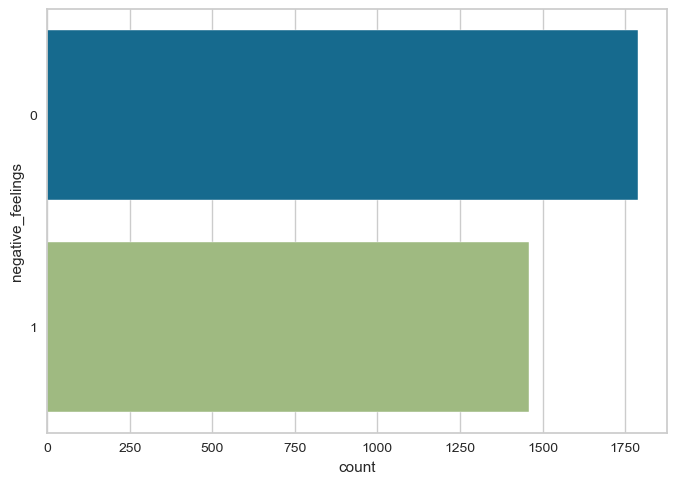

In [66]:
sns.countplot(y="negative_feelings", data=train_data)

<AxesSubplot: xlabel='count', ylabel='negative_feelings'>

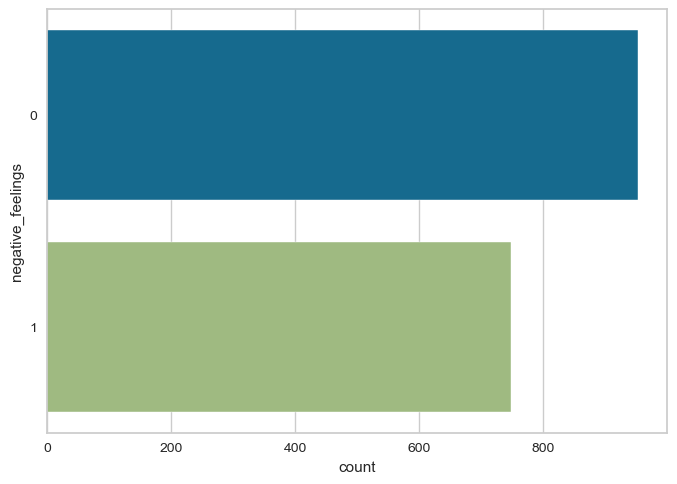

In [67]:
sns.countplot(y="negative_feelings", data=test_data)

In [68]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [69]:
grid = setup(data=train_data, target='negative_feelings', silent=True, session_id=123, fold_strategy='groupkfold', 
          fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,negative_feelings
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3248, 66)"
5,Missing Values,True
6,Numeric Features,40
7,Categorical Features,25
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='negative_feelings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                n...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_

In [70]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5539,0.5172,0.0087,0.2889,0.0170,0.0082,0.0324,1.1733
dummy,Dummy Classifier,0.5505,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0567
gbc,Gradient Boosting Classifier,0.5305,0.5209,0.3476,0.4806,0.3891,0.0368,0.0406,0.3967
rf,Random Forest Classifier,0.5280,0.5233,0.3064,0.4621,0.3543,0.0239,0.0236,0.1767
knn,K Neighbors Classifier,0.5258,0.5183,0.4215,0.4683,0.4423,0.0331,0.0332,0.7067
svm,SVM - Linear Kernel,0.5228,0.0000,0.3333,0.1528,0.2095,0.0000,0.0000,0.0733
lightgbm,Light Gradient Boosting Machine,0.5188,0.5246,0.4081,0.4682,0.4264,0.0248,0.0261,0.2600
et,Extra Trees Classifier,0.5182,0.5118,0.2828,0.4361,0.3156,0.0044,-0.0001,0.1567
ada,Ada Boost Classifier,0.5157,0.5134,0.3916,0.4611,0.4141,0.0165,0.0172,0.1567
dt,Decision Tree Classifier,0.5133,0.5073,0.3958,0.4525,0.4208,0.0070,0.0067,0.0667


create_model_container: 14
master_model_container: 14
display_container: 2
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
compare_models() succesfully completed......................................


Preprocessing steps added:
4. drop 'spo2', 'scl_avg'
5. replace outliers and NaNs with columns median

In [71]:
data=keep
data = preprocessing_functions.post_preprocessing(data, isSema=True)
data

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,Yoga/Pilates,negative_feelings,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e2f3967b776a240c654db,33.991756,69.820,28.5940,16.4,76.0,0.800000,0.850,0.600000,-1.184004,...,0.0,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
1,621e362467b776a2404ad513,34.526732,67.118,37.7220,10.6,77.0,0.800000,0.750,0.766667,-3.007565,...,0.0,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
2,621e301e67b776a240608a72,34.710232,61.555,35.4345,14.4,74.0,0.700000,0.700,0.833333,-1.822489,...,0.0,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
3,621e30e467b776a240e817c7,33.991756,61.555,35.4345,14.4,77.0,0.800000,0.750,0.766667,-1.379863,...,0.0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
4,621e36f967b776a240e5e7c9,33.991756,59.911,61.1570,15.0,83.0,0.933333,0.775,0.800000,-2.530838,...,0.0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,621e30f467b776a240f22944,33.503907,52.846,55.6020,12.8,77.0,0.800000,0.750,0.766667,-2.560771,...,0.0,0,0.866025,-0.781831,0.587785,-0.101168,0.5,0.62349,0.809017,-0.994869
4944,621e2f9167b776a240011ccb,34.716690,58.489,28.3290,14.2,76.0,0.800000,0.600,0.933333,-2.096381,...,0.0,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139
4945,621e346f67b776a24081744f,32.903545,71.863,25.4750,18.2,72.0,0.833333,0.625,0.733333,-3.234348,...,0.0,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139
4946,621e30f467b776a240f22944,34.352490,61.555,35.4345,13.4,77.0,0.800000,0.750,0.766667,-2.346201,...,0.0,0,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139


In [72]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

In [73]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [74]:
grid = setup(data=train_data, target='negative_feelings', silent=True, session_id=123, fold_strategy='groupkfold',
          fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,negative_feelings
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3248, 64)"
5,Missing Values,False
6,Numeric Features,57
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='negative_feelings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                n...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_

In [75]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5529,0.5504,0.3689,0.5159,0.4169,0.0817,0.0881,0.4200
lr,Logistic Regression,0.5505,0.5382,0.0000,0.0000,0.0000,0.0000,0.0000,0.0267
svm,SVM - Linear Kernel,0.5505,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0400
dummy,Dummy Classifier,0.5505,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0167
rf,Random Forest Classifier,0.5431,0.5257,0.3201,0.4890,0.3779,0.0528,0.0553,0.1733
et,Extra Trees Classifier,0.5422,0.5244,0.2995,0.4841,0.3484,0.0482,0.0504,0.1533
nb,Naive Bayes,0.5394,0.5318,0.3157,0.4899,0.3648,0.0451,0.0492,0.0267
ridge,Ridge Classifier,0.5345,0.0000,0.2274,0.4517,0.2794,0.0225,0.0184,0.0367
lda,Linear Discriminant Analysis,0.5336,0.5344,0.2238,0.4495,0.2764,0.0200,0.0156,0.0433
ada,Ada Boost Classifier,0.5308,0.5219,0.3571,0.4743,0.4019,0.0355,0.0367,0.1567


create_model_container: 14
master_model_container: 14
display_container: 2
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
compare_models() succesfully completed......................................


Preprocessing steps added
6. Normalization

In [76]:
data=keep
data = preprocessing_functions.post_preprocessing(data, isSema=True)
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [77]:
fold_groups

1       621e362467b776a2404ad513
4       621e36f967b776a240e5e7c9
5       621e337667b776a240ce78ab
6       621e32af67b776a24045b4cf
7       621e362467b776a2404ad513
                  ...           
4942    621e366567b776a24076a727
4943    621e30f467b776a240f22944
4945    621e346f67b776a24081744f
4946    621e30f467b776a240f22944
4947    621e331067b776a24085dd3f
Name: id, Length: 3248, dtype: object

In [78]:
saved_cols = train_data.columns

In [79]:
train_data, test_data = preprocessing_functions.normalization(train_data, test_data)
# put column names back
train_data.columns = saved_cols
test_data.columns = saved_cols
train_data

,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,...,Yoga/Pilates,negative_feelings,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,0.702769,0.628774,0.396967,0.078431,0.583333,0.600000,0.50,0.600000,0.090345,0.470363,...,0.0,0.0,2.775558e-16,0.500000,0.309017,0.005131,1.998401e-15,1.000000,1.000000,0.574623
1,0.535382,0.449816,0.715092,0.509804,0.750000,0.866667,0.55,0.666667,0.215948,0.505212,...,0.0,1.0,2.775558e-16,0.500000,0.309017,0.005131,1.998401e-15,1.000000,1.000000,0.574623
2,0.432478,0.276396,0.427063,0.137255,0.111111,0.266667,0.10,0.333333,0.576951,0.501845,...,0.0,1.0,2.775558e-16,0.500000,0.309017,0.005131,1.998401e-15,1.000000,1.000000,0.574623
3,0.535382,0.243991,0.475891,0.392157,0.638889,0.666667,0.40,0.800000,0.708764,0.458294,...,0.0,1.0,2.775558e-16,0.500000,0.309017,0.005131,1.998401e-15,1.000000,1.000000,0.574623
4,0.702769,0.628774,0.396967,0.078431,0.583333,0.600000,0.50,0.600000,0.090345,0.470363,...,0.0,0.0,2.775558e-16,0.500000,0.309017,0.005131,1.998401e-15,1.000000,1.000000,0.574623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0.311744,0.121697,0.728667,0.313725,0.555556,0.266667,0.65,0.666667,0.285664,0.975382,...,0.0,1.0,1.000000e+00,0.099031,0.587785,0.449351,1.998401e-15,0.801938,0.927199,0.000000
3244,0.382739,0.274384,0.639685,0.294118,0.583333,0.600000,0.50,0.600000,0.208062,0.652327,...,0.0,0.0,1.000000e+00,0.099031,0.587785,0.449351,1.998401e-15,0.801938,0.927199,0.000000
3245,0.194893,0.746598,0.230717,0.823529,0.444444,0.666667,0.25,0.533333,0.030594,0.155981,...,0.0,1.0,1.000000e+00,0.500000,0.809017,0.350126,1.998401e-15,1.000000,0.813808,0.020417
3246,0.648251,0.490639,0.365915,0.352941,0.583333,0.600000,0.50,0.600000,0.264594,0.270682,...,0.0,0.0,1.000000e+00,0.500000,0.809017,0.350126,1.998401e-15,1.000000,0.813808,0.020417


In [80]:
grid = setup(data=train_data, target='negative_feelings', silent=True, session_id=123, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,negative_feelings
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3248, 64)"
5,Missing Values,False
6,Numeric Features,58
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='negative_feelings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                n...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_

In [81]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.5505,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080
nb,Naive Bayes,0.5486,0.5144,0.0534,0.0481,0.0506,0.0064,0.0065,0.0100
qda,Quadratic Discriminant Analysis,0.5397,0.4800,0.0849,0.1273,0.0615,-0.0037,-0.0067,0.0110
lr,Logistic Regression,0.5046,0.4906,0.3116,0.4257,0.3451,-0.0270,-0.0294,0.0290
ridge,Ridge Classifier,0.5040,0.0000,0.3116,0.4279,0.3476,-0.0279,-0.0295,0.0070
svm,SVM - Linear Kernel,0.5028,0.0000,0.4555,0.4445,0.4285,-0.0045,0.0003,0.0170
lda,Linear Discriminant Analysis,0.5012,0.4903,0.3089,0.4212,0.3437,-0.0337,-0.0364,0.0150
ada,Ada Boost Classifier,0.4905,0.4554,0.3849,0.4242,0.3997,-0.0388,-0.0397,0.0970
gbc,Gradient Boosting Classifier,0.4773,0.4446,0.3192,0.4085,0.3511,-0.0747,-0.0738,0.3420
knn,K Neighbors Classifier,0.4726,0.4472,0.3493,0.3969,0.3653,-0.0784,-0.0811,0.0670


create_model_container: 14
master_model_container: 14
display_container: 2
DummyClassifier(constant=None, random_state=123, strategy='prior')
compare_models() succesfully completed......................................
